### Lab 3

In [7]:
# Required imports for code

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import PIL
from PIL import Image, ImageDraw, ImageFilter
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Problem 1

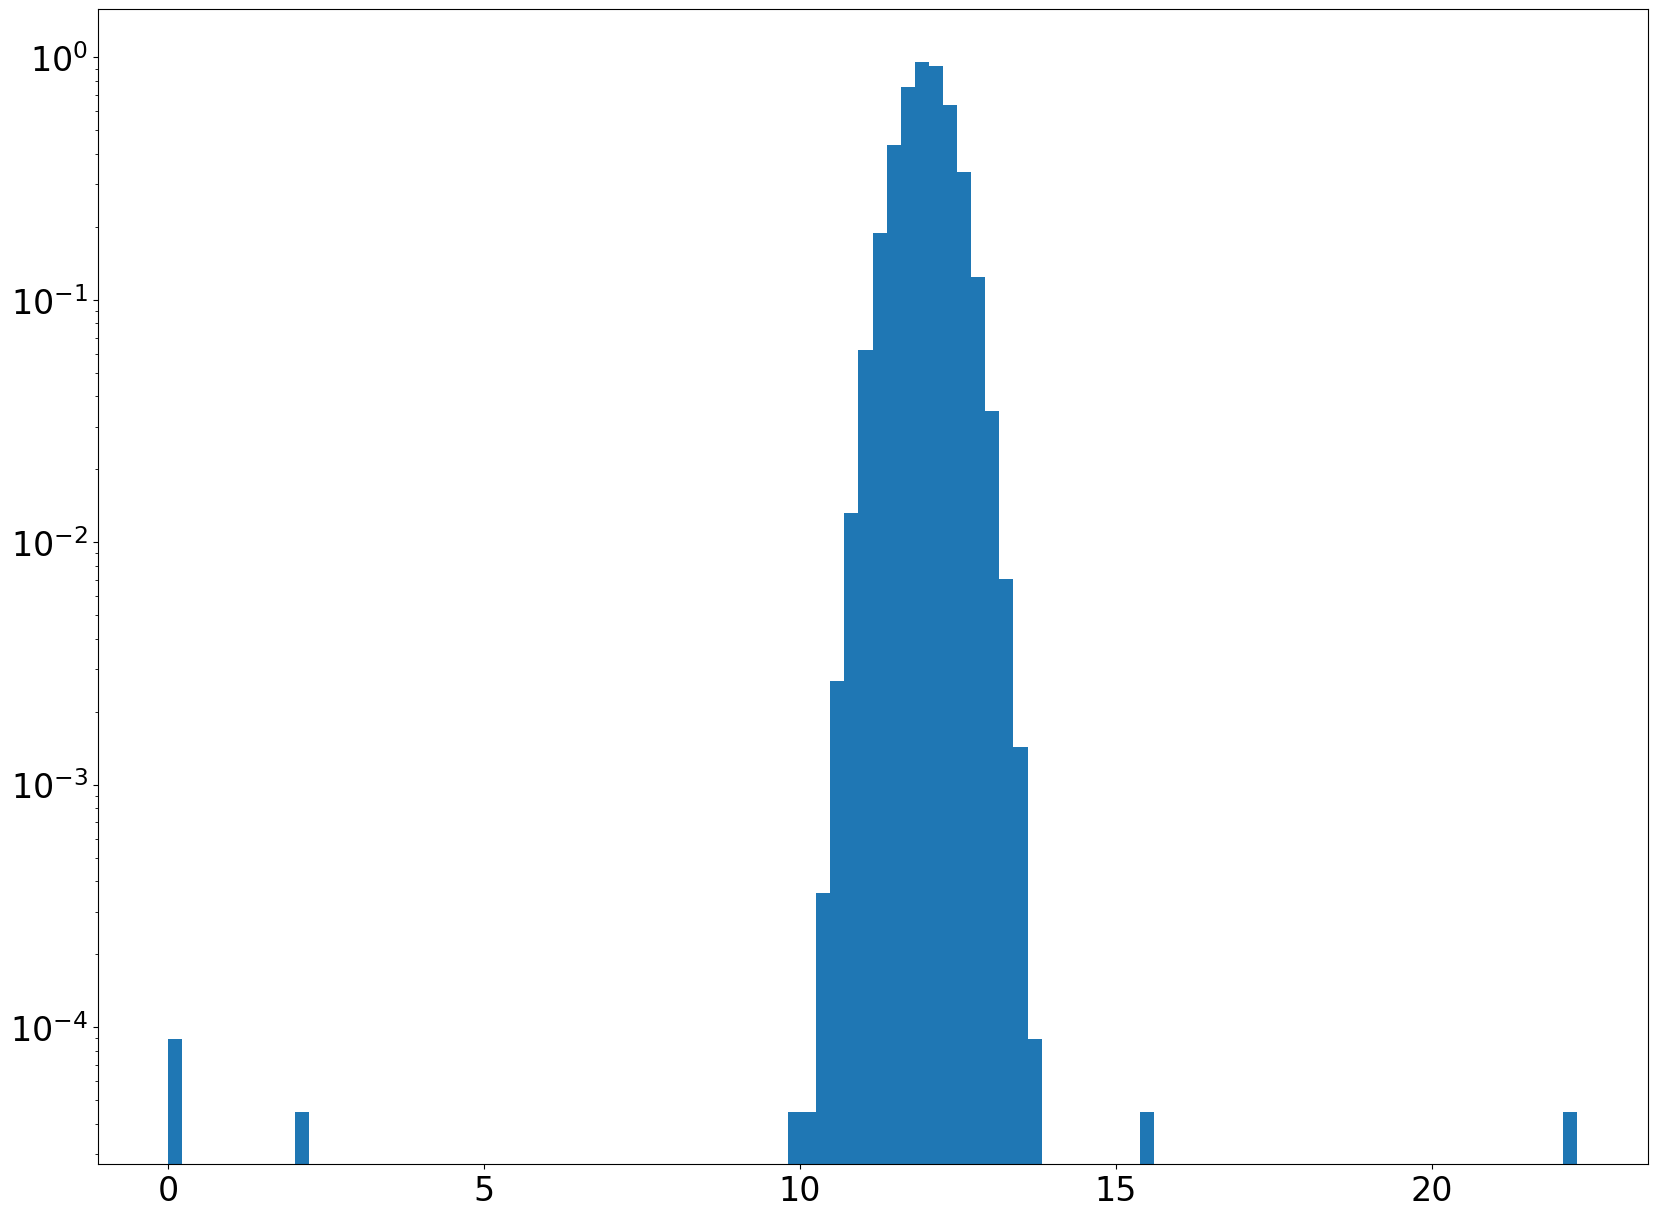

In [5]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

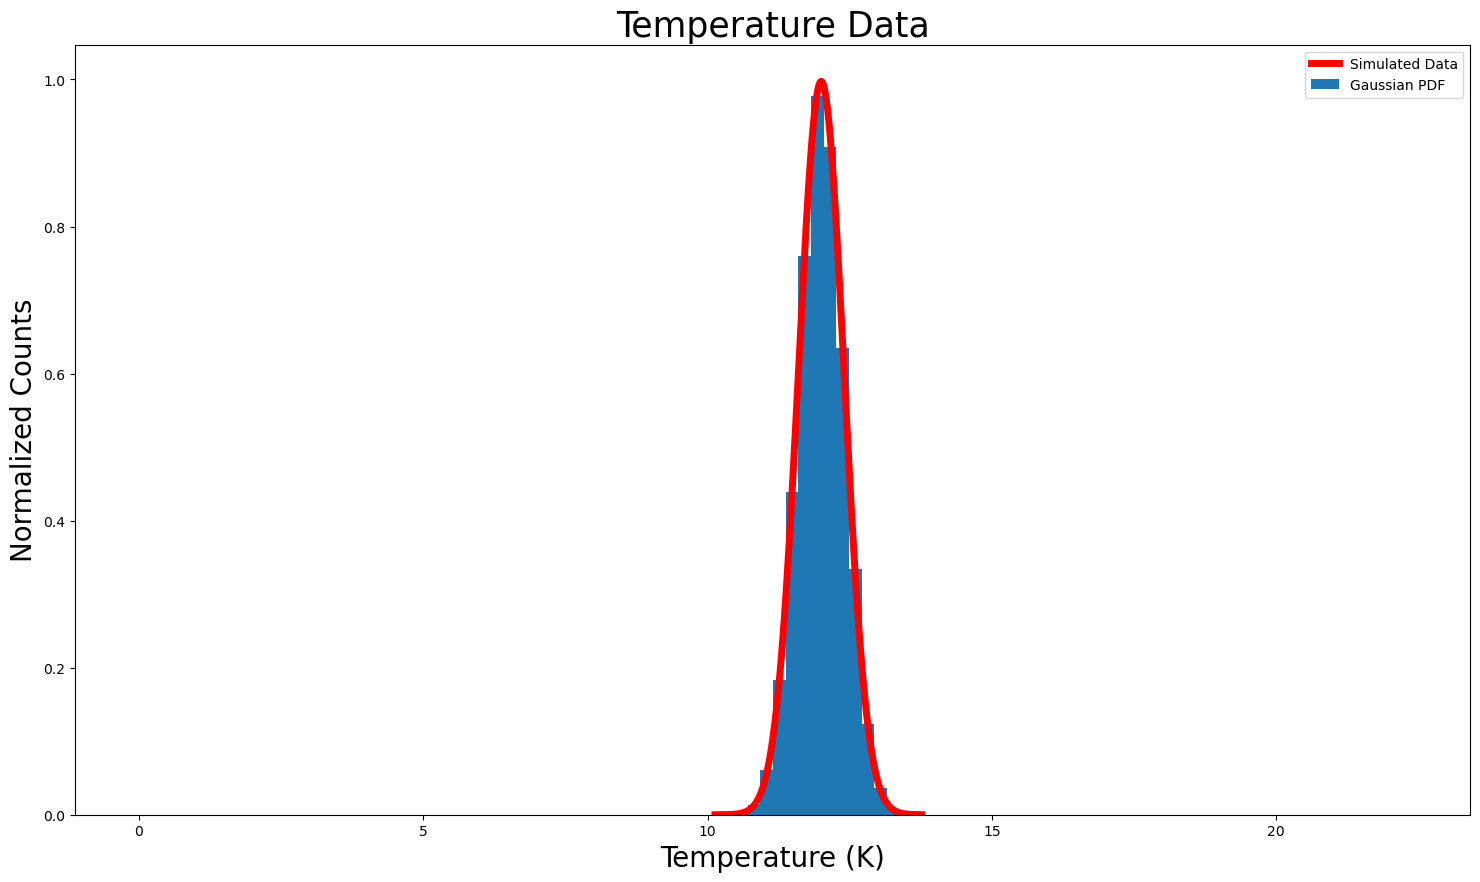

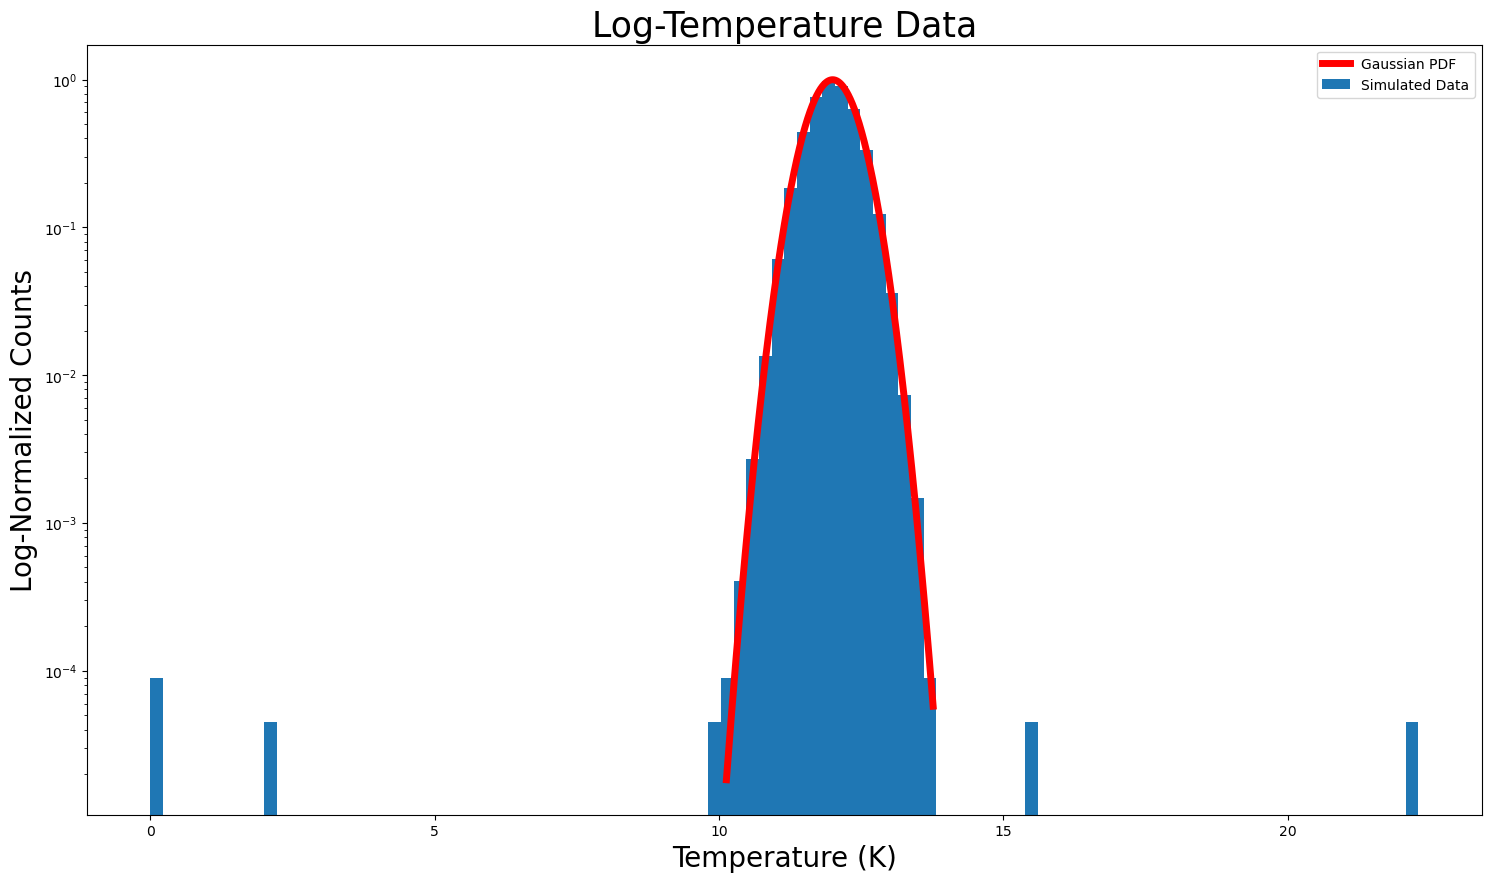

In [11]:
# Part 1A
goodData = stats.norm.rvs(loc = 12, scale = 0.4, size = 100000)
badData = [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7]
x = np.linspace(goodData.min(), goodData.max(), 100000)
norm_pdf = stats.norm.pdf(x, loc=12, scale=0.4)
combo = np.append(goodData, badData)

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Gaussian PDF")
plt.plot(x, norm_pdf, c = 'r', label = "Simulated Data", linewidth = 5)
plt.title("Temperature Data", fontsize = 25)
plt.xlabel("Temperature (K)", fontsize = 20)
plt.ylabel("Normalized Counts", fontsize = 20)
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
plt.hist(combo, 100, density = True, label = "Simulated Data")
plt.plot(x, norm_pdf, c = 'r', label = "Gaussian PDF", linewidth = 5)
plt.yscale('log')
plt.title("Log-Temperature Data", fontsize = 25)
plt.xlabel("Temperature (K)", fontsize = 20)
plt.ylabel("Log-Normalized Counts", fontsize = 20)
plt.legend()
plt.show()

### 1.A1: 
Above, the distribution of 100k good data points that have a Gaussian shape is plotted. It has a mean of 12 and a standard deviation of 0.4, with the 8 bad data points that were appended. I compared the distribution to an exact Gaussian distribution  in both the normalized axis and the log-normal axis. From the log-normal graph, it is apparant that there are mulitple outliers in the data that do not follow the Gaussian distribution. Therefore, the data must be optimized to maximize the good data and minimize the bad data.

### 1.A2: 
We expect a signal-free background to yield a Gaussian pdf with a mean of 12 and a standard deviation of 0.4. However, there are outliers which don't represent the data accurately. Which of the data points are significant enough to not be considered a product of the background? And therefore what is the standard deviation (or sigma) value associated with the optimal cut off point?

### 1.A3: 

In order to find the optimal cutoff location want to use the survival function on the guassian distribution and set it equal to the probability of 5 sigma; since that's what we deem significant enough. This will yield what values of temperature are significant enough to be considered not created by the background. In order to find x we can utilize the equation (x-u)/sigma. Therefore any temperature not in the range of 10-14 we can consider stastically significant enough to remove as bad data.

### 1.A4:

In [19]:
# Part 1.A4 
sigma = 5
goodKeep = goodData[np.where((goodData< 12+sigma*.4) & (goodData> 12-sigma*.4))]
goodDiscard = len(goodData) - len(goodKeep)
badData = np.asarray(badData)
badKeep = badData[np.where((badData>12-sigma*.4) & (badData<12+sigma*.4))]
badDiscard = len(badData) - len(badKeep)
print('Sigma value:', sigma)
print('Pos True:', len(goodKeep))
print('Pos False:', len(badKeep))
print('Neg True:', badDiscard)
print('Neg False:', goodDiscard)

Sigma value: 5
Pos True: 100000
Pos False: 2
Neg True: 6
Neg False: 0


### 1.A4: 
According to the truth table for a 5 sigma statistical significance, we are keeping 2 bad data values and all of the good data values.

In [22]:
# Part 1B
for i in range(1, 4): 
    goodKeep = goodData[np.where((goodData< 12+i*.4) & (goodData> 12-i*.4))]
    goodDiscard = len(goodData) - len(goodKeep)
    badData = np.asarray(badData)
    badKeep = badData[np.where((badData>12-i*.4) & (badData<12+i*.4))]
    badDiscard = len(badData) - len(badKeep)
    print('Sigma value:', i)
    print('Kept Good Data:', len(goodKeep))
    print('Kept Bad Data:', len(badKeep))
    print('Discarded Good Data:', badDiscard)
    print('Discarded Bad Data:', goodDiscard)
    print()

Sigma value: 1
Kept Good Data: 68174
Kept Bad Data: 0
Discarded Good Data: 8
Discarded Bad Data: 31826

Sigma value: 2
Kept Good Data: 95427
Kept Bad Data: 1
Discarded Good Data: 7
Discarded Bad Data: 4573

Sigma value: 3
Kept Good Data: 99721
Kept Bad Data: 1
Discarded Good Data: 7
Discarded Bad Data: 279



### 1B: 
Above, I redid the code with sigma values of 1, 2 and 3. It is apparant that the larger the threshhold is, the less likely you are to throw away good data. This is because more data will meet the demands of the threshold as the tolerances relax. And these omissions are predictable since we are dealing with a Gaussian distribution. We know that within 1, 2, and 3 standard deviations the percentage of data inside that range is 68%, 95%, and 99.7% respectively.

### 1C: 
Yes, there can be mistakes of commission. In our example with 5 sigma we had two bad data points. However, they are avoidable by making the statistical threshold smaller. However, this comes at a price described in the answer above. If we decrease the threshold too much then we omit more good data. So finding a good balance between accepting good data and rejecting bad data will yield the most optimal threshold.

### Problem 2: 

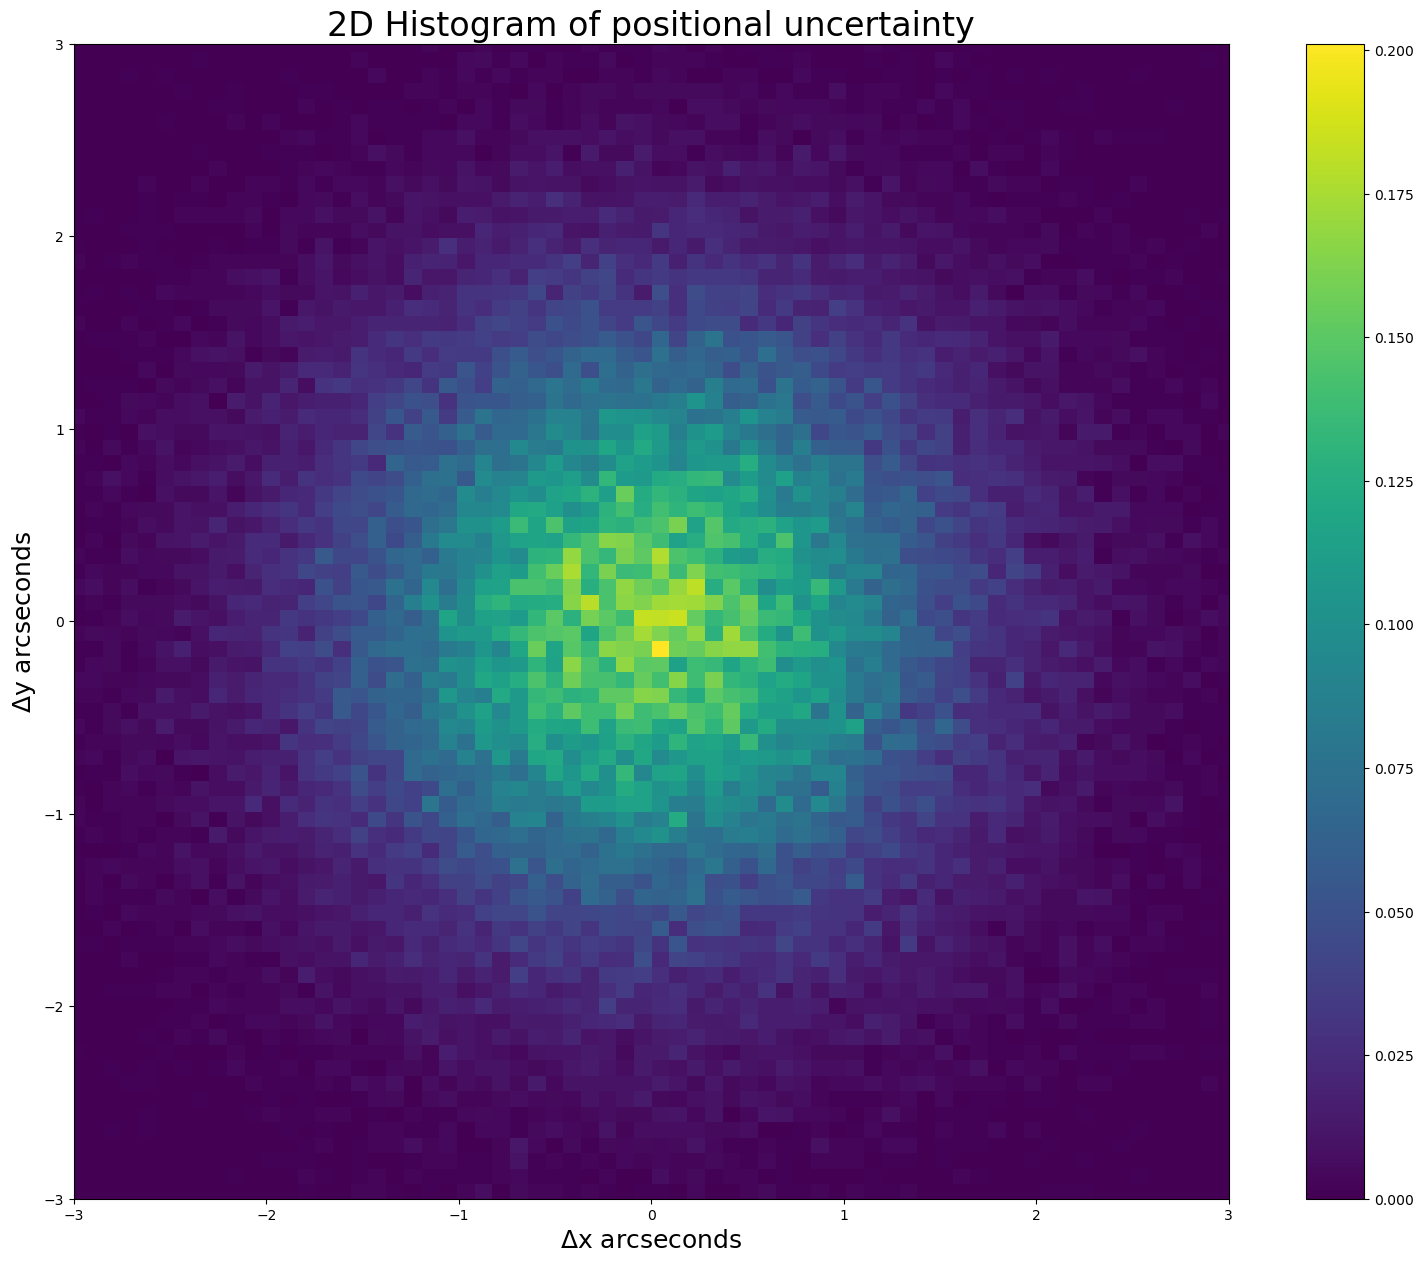

In [23]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### 2.1:
Given a 2 dimensional Guassian distribution with a mean of 0 and a standard deviation of 1 arc second as our signal-free background, at what movements of delta x and delta y would have a 5 sigma probability of occuring from our background and could thus be determined to be caused by potential asteroids?

In [26]:
# Part 2.2
print('5 sigma probability:', str(1-stats.norm.cdf(5)))

5 sigma probability: 2.866515719235352e-07


### 2.2
Above is the probability of 5 sigma for a normal gaussian distribution, which translates to the integral of the pdf from a value x out to infinity. If we want to know what distance corresponds to 5 sigma what we will want to look for is the bound d. Since it's a 2D distribution, d is essentially the Pythagorean theorem. Therefore, we are going to use r to be the distance from the origin. Since the distribution is radially symmetric we can convert into polar form and calculate the distance 

In [8]:
Image.open('Lab3_Prob2_image')

FileNotFoundError: [Errno 2] No such file or directory: 'Lab3_Prob2_image'

### Problem 3

### 3.1:

We expect the moon to shadow the Earth from cosmic gamma rays. In a moon sized patch of the sky, we expect to see 1 gamma ray a minute and this effectively gives us a Poisson background pdf. Assuming a Poisson signal-free background pdf with $\mu$ equal to 1 cosmic ray per minute, what is the significance of detecting 6,800 counts of gamma rays after 7,200 minutes (8 hours) of observing the location of the moon?

### 3.2:
We need to find the background pdf for a single minute then multiply that by 7200 minutes of observing the moon to get the adjusted background pdf. After that,in order to get the probability that we would observe 6800 or less counts of cosmic rays we would need to integrate the adjusted background pdf from negative infinity to 6800. After that we can calculate the sigma value corresponding to that for a standard normal distribution. 

A unique aspect of this problem is the definition of what it means for a measurement to be "more signal-like" - because seeing less cosmic rays indicates the presence of an object blocking the rays; seeing less cosmic rays corresponds to a stronger signal. Therefore, this changes the bounds of our integral from 0 to 6800, instead of integrating from some point out to infinity. 

In [28]:
# Part 3.3
prob = np.abs(stats.poisson.cdf(6800, mu=7200))
sigma = stats.norm.ppf(prob)
print("Probability:", prob)
print("Sigma:", abs(sigma))

Probability: 1.0133280183917768e-06
Sigma: 4.750747965777188


### 3.3:
The calculated sigma value for the significance of the moon shadow is 4.75